In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt

In [15]:
# 로이터 기사 데이터 셋을 로딩합니다.

from keras.datasets import reuters
(train_data, train_labels),(test_data, test_labels) = reuters.load_data(num_words=10000) #너무 많으니 자주 쓰는 단어들만 가져오자.

In [16]:
train_data.shape

(8982,)

In [20]:
train_data[0]

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [24]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

decoded_newsire = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])

In [25]:
decoded_newsire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [28]:
train_labels[0]

3

In [30]:
# 데이터의 준비

def vectorize_sequences(sequences, dimension=10000):

  results = np.zeros((len(sequences),dimension))

  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1

  return results

# 데이터의 변환
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [31]:
train_labels

array([ 3,  4,  3, ..., 25,  3, 25])

In [32]:
# 라벨 데이터의 엔코딩
def to_one_hot(labels, dimension=46): #46은 이 데이터의 topic수
  results = np.zeros((len(labels),dimension))

  for i, sequence in enumerate(labels):
    results[i, sequence] = 1

  return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [34]:
# categorical 데이터로 변환 (컴퓨터가 숫자로 인식해버려서 계산하는 것을 방지)
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels) #원핫을 날려도 되고 그냥 카테고리로 바로 날려도 되고, 본인 선택의 몫(이건 회사마다 다르다고 함.)
one_hot_test_labels = to_categorical(test_labels) #32번째(윗단계)는 학습을 위해서 써본거지 실제론 이것만써도 충분하다고 함.

In [37]:
# 신경망을 구성합니다.
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [39]:
model.summary() #얽히고 설킨 params를 확인. 맨 위 레이어와 아래의 레이어 Param 차이가 크다(정보의 유실이 일어날 수 있다.해결법->모든 유닛을 특정 값으로 고정.)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                640064    
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 dense_6 (Dense)             (None, 46)                2990      
                                                                 
Total params: 647,214
Trainable params: 647,214
Non-trainable params: 0
_________________________________________________________________


In [48]:
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])# 분류 문제에선 기본이 accuracy

In [49]:
# 훈련 데이터의 준비

x_val = x_train[:1000] #데이터가 많지않아 검증용 데이터는 1000번째까지 잡음.
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [50]:
history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 80ms/step - loss: 2.6695 - accuracy: 0.5192 - val_loss: 1.7132 - val_accuracy: 0.6250
Epoch 2/20
16/16 [==============================] - 1s 60ms/step - loss: 1.4111 - accuracy: 0.7098 - val_loss: 1.2851 - val_accuracy: 0.7190
Epoch 3/20
16/16 [==============================] - 1s 60ms/step - loss: 1.0428 - accuracy: 0.7793 - val_loss: 1.1173 - val_accuracy: 0.7590
Epoch 4/20
16/16 [==============================] - 1s 59ms/step - loss: 0.8209 - accuracy: 0.8266 - val_loss: 1.0224 - val_accuracy: 0.7830
Epoch 5/20
16/16 [==============================] - 1s 63ms/step - loss: 0.6604 - accuracy: 0.8608 - val_loss: 0.9588 - val_accuracy: 0.8000
Epoch 6/20
16/16 [==============================] - 1s 68ms/step - loss: 0.5305 - accuracy: 0.8900 - val_loss: 0.9351 - val_accuracy: 0.8060
Epoch 7/20
16/16 [==============================] - 1s 67ms/step - loss: 0.4291 - accuracy: 0.9100 - val_loss: 0.9366 - val_accuracy: 0.8000
Epoch 8/20
16

In [53]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(loss) + 1)

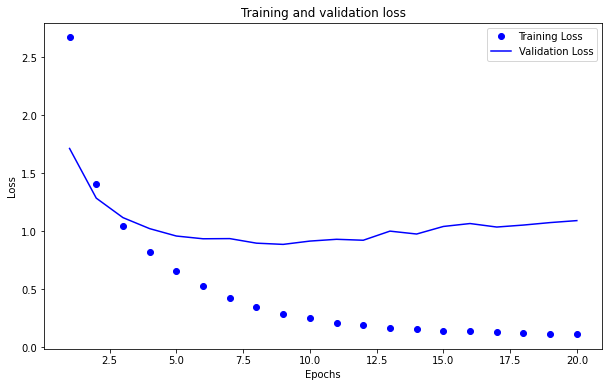

In [59]:
# 결과를 시각화 한다.
plt.figure(figsize=(10,6))
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b-', label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# 8번 정도 epochs를 돌리면 최상의 모델을 뽑아 낼 수 있다.

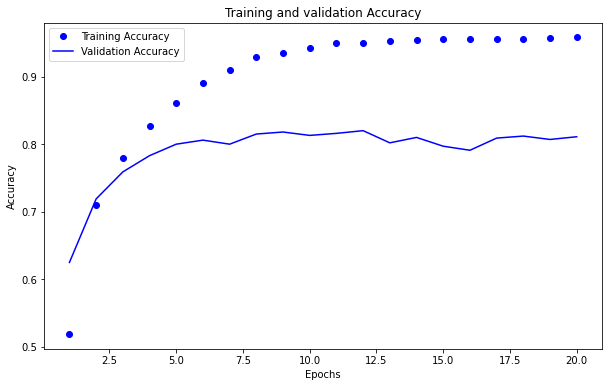

In [60]:
# 결과를 시각화 한다. (accurancy 기반으로)
plt.figure(figsize=(10,6))
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b-', label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [61]:
# 극단적으로 가보자. (정보의 갯수를 작게)
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu')) # 64 -> 4로 바꿈.
model.add(layers.Dense(46, activation='softmax'))

Epoch 1/20
16/16 [==============================] - 3s 89ms/step - loss: 3.5133 - accuracy: 0.2963 - val_loss: 3.1937 - val_accuracy: 0.3740
Epoch 2/20
16/16 [==============================] - 1s 58ms/step - loss: 2.9346 - accuracy: 0.3969 - val_loss: 2.7353 - val_accuracy: 0.4070
Epoch 3/20
16/16 [==============================] - 1s 58ms/step - loss: 2.4980 - accuracy: 0.4245 - val_loss: 2.4196 - val_accuracy: 0.4160
Epoch 4/20
16/16 [==============================] - 1s 60ms/step - loss: 2.2074 - accuracy: 0.4385 - val_loss: 2.2219 - val_accuracy: 0.4230
Epoch 5/20
16/16 [==============================] - 1s 60ms/step - loss: 2.0098 - accuracy: 0.4459 - val_loss: 2.0899 - val_accuracy: 0.4360
Epoch 6/20
16/16 [==============================] - 2s 112ms/step - loss: 1.8531 - accuracy: 0.4580 - val_loss: 1.9651 - val_accuracy: 0.4440
Epoch 7/20
16/16 [==============================] - 2s 102ms/step - loss: 1.7062 - accuracy: 0.4757 - val_loss: 1.8471 - val_accuracy: 0.4680
Epoch 8/20


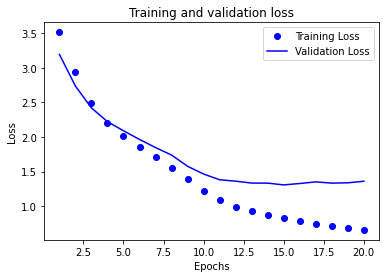

In [62]:
model.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])
 
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]


history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(loss) + 1)


# 결과를 시각화 한다. 
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b-', label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [ ]:
# 충분한 정보의 갯수가 필요함을 알 수 있다.

In [63]:
# 극단적으로 가보자. (정보의 갯수를 크게)
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1000, activation='relu')) # 64 -> 4로 바꿈.
model.add(layers.Dense(46, activation='softmax'))

Epoch 1/20
16/16 [==============================] - 3s 81ms/step - loss: 2.2000 - accuracy: 0.5239 - val_loss: 1.4465 - val_accuracy: 0.6650
Epoch 2/20
16/16 [==============================] - 1s 67ms/step - loss: 1.2204 - accuracy: 0.7197 - val_loss: 1.1727 - val_accuracy: 0.7320
Epoch 3/20
16/16 [==============================] - 1s 67ms/step - loss: 0.9201 - accuracy: 0.7863 - val_loss: 1.0486 - val_accuracy: 0.7680
Epoch 4/20
16/16 [==============================] - 1s 67ms/step - loss: 0.6835 - accuracy: 0.8384 - val_loss: 0.9986 - val_accuracy: 0.7770
Epoch 5/20
16/16 [==============================] - 1s 67ms/step - loss: 0.5249 - accuracy: 0.8722 - val_loss: 0.9545 - val_accuracy: 0.7970
Epoch 6/20
16/16 [==============================] - 1s 67ms/step - loss: 0.4008 - accuracy: 0.9052 - val_loss: 0.9530 - val_accuracy: 0.8100
Epoch 7/20
16/16 [==============================] - 1s 69ms/step - loss: 0.3042 - accuracy: 0.9303 - val_loss: 0.9391 - val_accuracy: 0.8200
Epoch 8/20
16

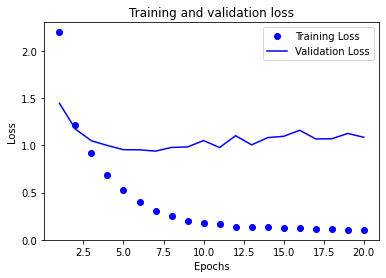

In [64]:
model.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])
 
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]


history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(loss) + 1)


# 결과를 시각화 한다. 
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b-', label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [ ]:
# 값을 크게 늘려도 별 다른 차이가 없다.
#즉, 최적화될 수 있는 최적의 값을 찾아서 돌려야 된다.(나중에 하다보면 노하우가 생김)